## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [1]:
!pip install py-openaq

  Created wheel for py-openaq: filename=py_openaq-1.1.0-py3-none-any.whl size=9037 sha256=1fb65c431cbcf55864889d91bbef1bfe5c0f43749c278d1678615a689560c86c
  Stored in directory: /home/jovyan/.cache/pip/wheels/b7/64/46/caec8d415716f8ebeb1e95f11d8c83aff852f41ab6eb1dc98f
Successfully built py-openaq


In [36]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [37]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [8]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
13272,2021-10-03 22:00:00,London Eltham,o3,51.8,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-03 21:00:00+00:00,51.452580,0.070766
7704,2021-10-07 18:00:00,London Haringey Priory Park South,o3,35.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-07 17:00:00+00:00,51.584128,-0.125254
14135,2021-10-03 01:00:00,ES1811A,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-03 02:00:00+00:00,40.167220,-3.276670
24540,2021-09-30 01:00:00,FR04004,no2,20.5,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-09-29 23:00:00+00:00,48.891670,2.346669
17356,2021-10-01 10:00:00,London Harlington,pm10,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 09:00:00+00:00,51.488790,-0.441614


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [4]:
higho3levelfilter=(airQualityCities['parameter']=='o3')&(airQualityCities['value']>=120)

In [5]:
airQualityCities[higho3levelfilter]

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
7833,2021-10-07 18:00:00,ES1810A,o3,120.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-07 16:00:00+00:00,40.251940,-4.274720
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
26822,2021-09-29 19:00:00,ES1810A,o3,120.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-09-29 17:00:00+00:00,40.251940,-4.274720
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523


In [10]:
#This shows that there are only two cities which report a o3 level higher than 120 µg/m³: Madrid and Delhi

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

In [6]:
AirQualityCitiesCO=airQualityCities[airQualityCities['parameter']=='co']

In [7]:
AirQualityCitiesCO

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
505,2021-10-12 04:00:00,DEBE061,co,180.0,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-10-12 02:00:00+00:00,52.463611,13.318250
532,2021-10-12 04:00:00,ES1613A,co,500.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-12 02:00:00+00:00,40.666390,-3.772220
549,2021-10-12 04:00:00,ES1810A,co,200.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-12 02:00:00+00:00,40.251940,-4.274720
550,2021-10-12 04:00:00,ES1802A,co,200.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-12 02:00:00+00:00,40.910280,-3.466670
563,2021-10-12 04:00:00,ES1563A,co,400.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-12 02:00:00+00:00,40.479170,-3.377780
...,...,...,...,...,...,...,...,...,...,...
37054,2021-09-28 20:15:00,"DTU, Delhi - CPCB",co,510.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.750050,77.111261
37059,2021-09-28 20:15:00,"Lodhi Road, Delhi - IMD",co,390.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.591825,77.227307
37061,2021-09-28 20:15:00,"IGI Airport (T3), Delhi - IMD",co,1800.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.562776,77.118005
37066,2021-09-28 20:15:00,"Dr. Karni Singh Shooting Range, Delhi - DPCC",co,1200.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.498571,77.264840


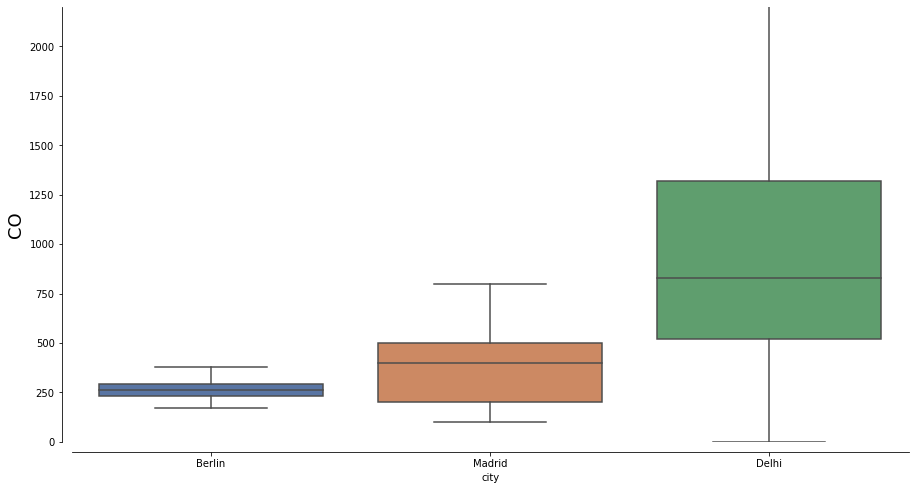

In [8]:
fig, CO = plt.subplots(1, figsize=(15,8))

CO = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesCO,
    fliersize=0,
    palette='deep',
    ax=CO)

CO.set_ylim([0, 2200])
CO.set_ylabel("CO", fontsize=18)
CO.set_xlabel("city")

sns.despine(offset=10)


plt.show()

In [9]:
AirQualityCitiesNO2=airQualityCities[airQualityCities['parameter']=='no2']

In [10]:
AirQualityCitiesNO2

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
6,2021-10-12 18:00:00,Southend-on-Sea,no2,15.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
7,2021-10-12 18:00:00,Thurrock,no2,24.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
16,2021-10-12 18:00:00,London Harlington,no2,17.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
37057,2021-09-28 20:15:00,"ITO, Delhi - CPCB",no2,18.90,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.628624,77.241060
37078,2021-09-28 20:15:00,"Lodhi Road, Delhi - IMD",no2,7.87,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.591825,77.227307
37079,2021-09-28 20:15:00,"CRRI Mathura Road, Delhi - IMD",no2,13.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.551201,77.273574
37084,2021-09-28 20:15:00,"IGI Airport (T3), Delhi - IMD",no2,11.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.562776,77.118005


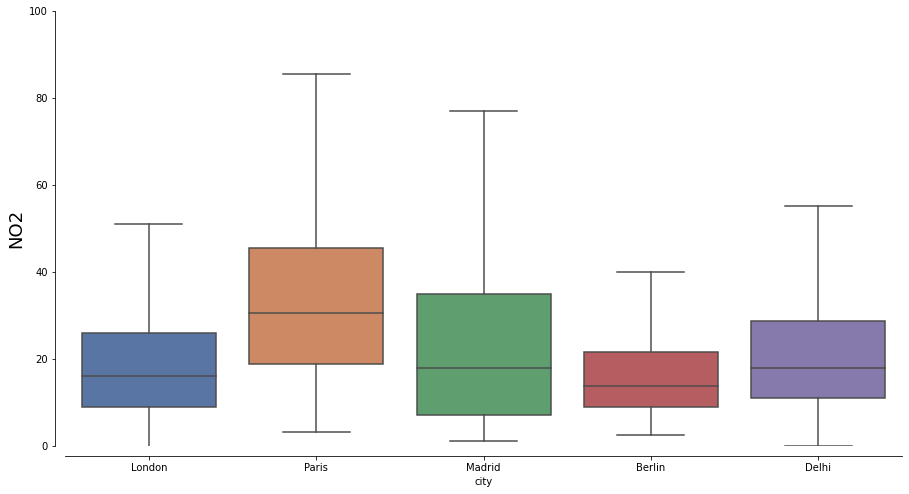

In [11]:
fig, NO2 = plt.subplots(1, figsize=(15,8))

NO2 = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesNO2,
    fliersize=0,
    palette='deep',
    ax=NO2)

NO2.set_ylim([0, 100])
NO2.set_ylabel("NO2", fontsize=18)
NO2.set_xlabel("city")

sns.despine(offset=10)


plt.show()

In [12]:
AirQualityCitiesO3=airQualityCities[airQualityCities['parameter']=='o3']

In [13]:
AirQualityCitiesO3

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
13,2021-10-12 18:00:00,London Harlington,o3,34.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
14,2021-10-12 18:00:00,Thurrock,o3,25.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
15,2021-10-12 18:00:00,London Haringey Priory Park South,o3,35.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.584128,-0.125254
19,2021-10-12 18:00:00,Southend-on-Sea,o3,34.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
20,2021-10-12 18:00:00,London Eltham,o3,24.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
...,...,...,...,...,...,...,...,...,...,...
37069,2021-09-28 20:15:00,"Rohini, Delhi - DPCC",o3,6.10,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.732528,77.119920
37074,2021-09-28 20:15:00,"NSIT Dwarka, Delhi - CPCB",o3,27.92,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.609090,77.032541
37076,2021-09-28 20:15:00,"Lodhi Road, Delhi - IITM",o3,17.16,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.588333,77.221667
37080,2021-09-28 20:15:00,"Dwarka-Sector 8, Delhi - DPCC",o3,1.10,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.571027,77.071901


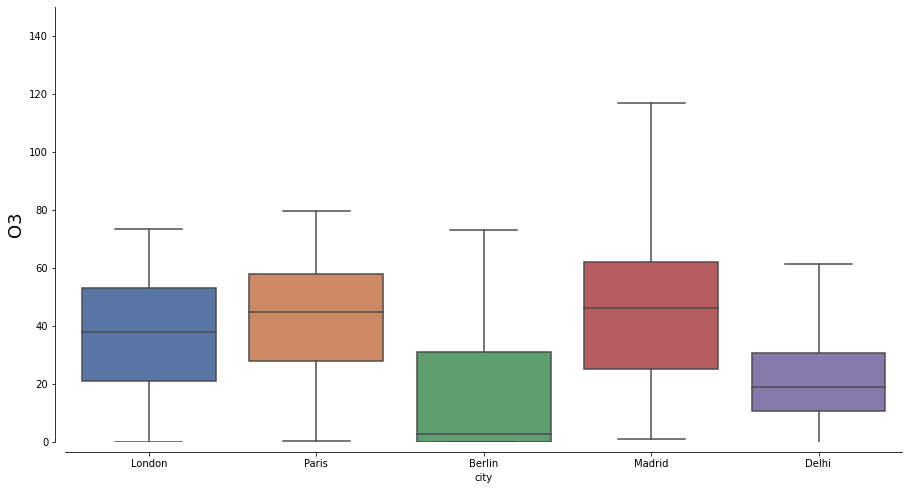

In [14]:
fig, O3 = plt.subplots(1, figsize=(15,8))

O3 = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesO3,
    fliersize=0,
    palette='deep',
    ax=O3)

O3.set_ylim([0, 150])
O3.set_ylabel("O3", fontsize=18)
O3.set_xlabel("city")

sns.despine(offset=10)


plt.show()

In [15]:
AirQualityCitiesPM10=airQualityCities[airQualityCities['parameter']=='pm10']

In [16]:
AirQualityCitiesPM10

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
5,2021-10-12 18:00:00,London Harlington,pm10,17.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
8,2021-10-12 18:00:00,London Eltham,pm10,13.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
11,2021-10-12 18:00:00,Thurrock,pm10,24.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
25,2021-10-12 17:00:00,London Eltham,pm10,13.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.452580,0.070766
...,...,...,...,...,...,...,...,...,...,...
37063,2021-09-28 20:15:00,"IHBAS, Dilshad Garden, Delhi - CPCB",pm10,93.92,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.681174,77.302523
37067,2021-09-28 20:15:00,"Sirifort, Delhi - CPCB",pm10,162.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.550425,77.215938
37072,2021-09-28 20:15:00,"Najafgarh, Delhi - DPCC",pm10,64.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.570173,76.933762
37075,2021-09-28 20:15:00,"Rohini, Delhi - DPCC",pm10,99.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.732528,77.119920


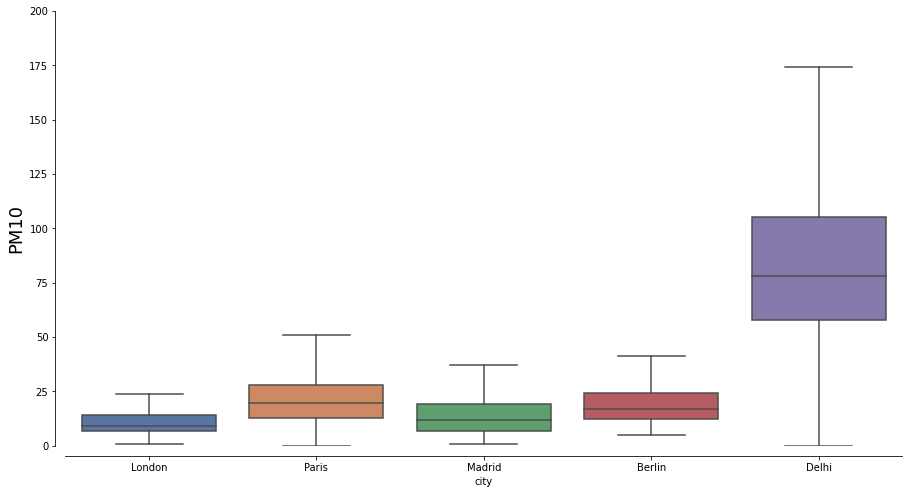

In [17]:
fig, PM10 = plt.subplots(1, figsize=(15,8))

PM10 = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM10,
    fliersize=0,
    palette='deep',
    ax=PM10)

PM10.set_ylim([0, 200])
PM10.set_ylabel("PM10", fontsize=18)
PM10.set_xlabel("city")

sns.despine(offset=10)


plt.show()

In [18]:
#looking at 4 out of the 6 parameters it semms like overall Berlin has the cleanest air

## Question 3. Which location is the most poluted in London ?

In [38]:
Londonfilter=airQualityCities['city']=='London'

In [39]:
London=airQualityCities[Londonfilter]

In [40]:
London.groupby(['location','parameter'])['value'].mean()

location                           parameter
London Eltham                      no2          13.364259
                                   o3           33.454789
                                   pm10         10.614747
                                   pm25          7.262673
London Haringey Priory Park South  no2          17.434932
                                   o3           40.198813
London Harlington                  no2          20.729642
                                   o3           36.493151
                                   pm10         10.040956
                                   pm25          6.187713
Southend-on-Sea                    no2          15.294985
                                   o3           39.855030
                                   pm10         11.887906
                                   pm25          7.707965
Thurrock                           no2          20.865192
                                   o3           30.346313
                           

In [22]:
#it depends on which parameter you look at: no2 is reportes by all loctions in London. In terms of no2 pollution Tower Hamlets Roadside is on average to most polluted.

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

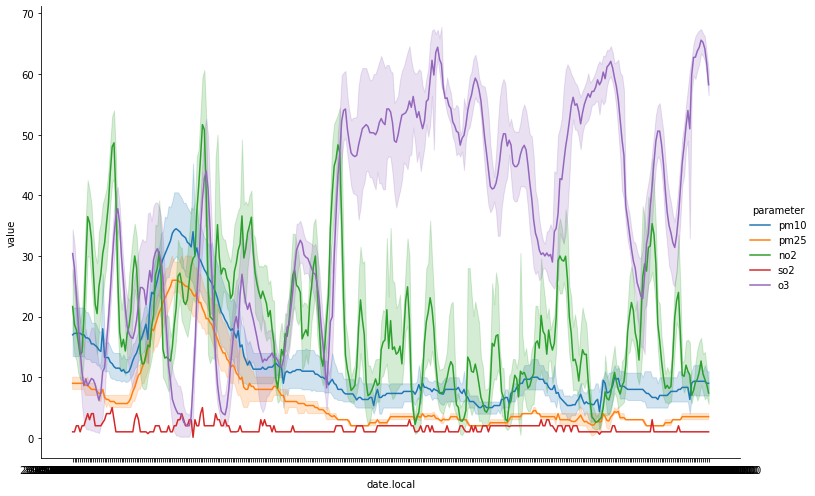

In [41]:
sns.relplot(
    data=London,
    x="date.local", y="value",
    hue="parameter",
    height=7, aspect=1.5, kind="line")

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [27]:
### response: they are strongly correlated

In [42]:
pm10andpm25filter=(London['parameter']=='pm10')|(London['parameter']=='pm25')

In [46]:
Londonpm10andpm25=London[pm10andpm25filter]

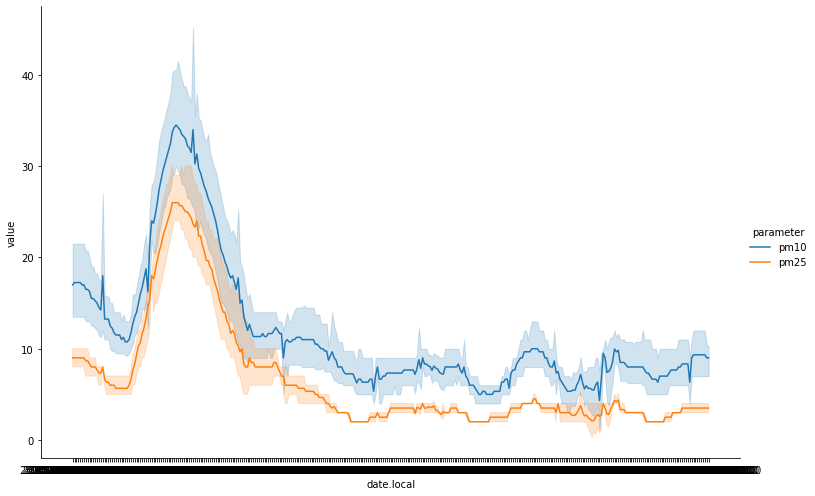

In [47]:
sns.relplot(
    data=Londonpm10andpm25,
    x="date.local", y="value",
    hue="parameter",
    height=7, aspect=1.5, kind="line")

In [ ]:
#the values of the paramters pm10 and pm25 move together over time. This indicated a correlation between the two parameters.